# Aerofit: Descriptive Statistics & Probability

## 1 Overview

### 1.1 Problem Statement

#### About AEROFIT

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

#### Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers.
The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1. Perform descriptive analytics **to create a customer profile** for each AeroFit treadmill product by developing appropriate tables and charts.
1. For each AeroFit treadmill product, construct **two-way contingency tables** and compute all **conditional and marginal probabilities** along with their insights/impact on the business.

### 1.2 About Dataset

#### Features

The dataset has the following features:

1. `Product`: Product Purchased: KP281, KP481, or KP781
1. `Age`: In years.
1. `Gender`: Male/Female
1. `Education`: In years.
1. `MaritalStatus`: Single or Partnered.
1. `Usage`: The average number of times the customer plans to use the treadmill each week.
1. `Fitness`: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
1. `Income`: Annual income in USD.
1. `Miles`: The average number of miles the customer expects to walk/run each week.

#### Observations

1. As per the description of the features it seems like data set is before the purchase of the product. 
2. For example `Usage` is **not the actual usage of the product** post purchase but its actually the number off times **customer plans to use** the product.
3. `Fitness` is **self rated**. Every individual has different perspectives on fitness, hence the rating is not standard but self-perceived.

### 1.3 Objective

Objective of this case study is to perform an Exploratory Data Analysis (EDA) on the dataset and attempt to:

1. Extract useful information from data using **descriptive statistics**
2. Based on the information extracted find some business insights.
3. Create customer profile for three AeroFit treadmill products (KP281, KP481 and KP781).

## 2 Setup

### 2.1 Libraries

#### Import Libraries

In [1]:
# General libraries.
import re
from datetime import datetime

# Data manipulation libraries.
import numpy as np
import pandas as pd

# Data visualization libraries.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud


print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Wordcloud version:", wordcloud.__version__)

NumPy version: 2.3.1
Pandas version: 2.3.1
Matplotlib version: 3.10.3
Seaborn version: 0.13.2
Wordcloud version: 1.9.4


#### Configure Libraries

In [2]:
# Configure Numpy.
np.set_printoptions(linewidth=130)

# Configure Pandas.
pd.options.display.width = 130

# Configure Seaborn.
sns.set_style("whitegrid")
sns.set_palette("deep")
# sns.set_context("paper", font_scale=1.2)

### 2.2 Dataset

#### Import DataSet

In [3]:
af_df = pd.read_csv("data/aerofit_treadmill.csv")

row_count, col_count = af_df.shape

display(af_df.head(4))
print(f"Dataset has {row_count} rows and {col_count} columns.")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85


Dataset has 180 rows and 9 columns.


### 2.3 Data Profiling

In [4]:
af_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


###### Observations

1. None of the columns are missing data (non-null count matching the total number of rows).
2. `Product`, `Gender` and `MaritalStatus` are of datatype string.
3. `Age`, `Education`, `Usage`, `Fitness` are of datatype integers.
4. Surprisingly `Income` and `Miles` are of datatype integer instead of float.

#### 1 Feature types

List of categorical features:

1. Product
2. Gender
3. MaritalStatus
4. Fitness

List of Numerical features:

1. Age
2. Education
3. Usage
4. Income
5. Miles

#### 2 Cardinality

In [5]:
af_df.nunique().sort_values(ascending=False)

Income           62
Miles            37
Age              32
Education         8
Usage             6
Fitness           5
Product           3
MaritalStatus     2
Gender            2
dtype: int64

###### Observations

1. Its obvious that features like `Income`, `Miles` and `Age` will have high cardinality.
2. Rest of the features have lower cardinality and some of them can be converted to categorical type.

#### 3 Correlation

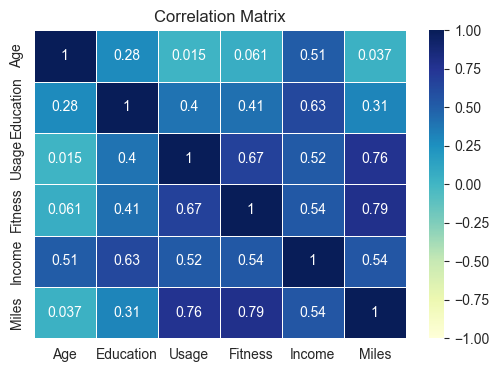

In [6]:
plt.figure(figsize=(6, 4))
corr = af_df.corr(numeric_only=True)
sns.heatmap(corr, cmap="YlGnBu", linecolor="white", linewidth=0.5, vmin=-1, vmax=1, annot=True)
plt.title("Correlation Matrix")
plt.show()

##### Observations

1. Features `Miles` and `Usage` have high correlation.
2. Features `Miles` and `Fitness` have high correlation.
3. Features `Usage` and `Fitness` have high correlation.
4. Features `Education` and `income` have high correlation.

#### 4 Duplicate check

In [7]:
af_df[af_df.duplicated()]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


##### Observations

There are no duplicate records in the dataset.

## 3 Data Wrangling

Under Data Wrangling lets perform these operations:

1. Data Validation
2. Transform Features
3. Feature engineering

### 3.1 Data Validation

#### Feature `Product`

In [8]:
af_df["Product"].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

#### Feature `Age`

In [9]:
af_df["Age"].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

##### Observations

Age feature is within the sensible range between 18 and 50

#### Feature `Gender`

In [10]:
af_df["Gender"].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

#### Feature `Education`

In [11]:
af_df["Education"].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

In USA schooling starts at the age of 5. Lets check if anybody has number of years of education greater than their age.

In [12]:
mask = (af_df["Age"] - af_df["Education"]) < 5
af_df.loc[mask, ["Age", "Gender", "Education"]]

,Age,Gender,Education
0,18,Male,14
1,19,Male,15
142,22,Male,18


#### Feature `MaritalStatus`

In [13]:
af_df["MaritalStatus"].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

#### Feature `Usage`

In [14]:
af_df["Usage"].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

##### Observations

Feature `Usage` is within the valid range between 1 and 7 days in week.

#### Feature `Fitness`

In [15]:
af_df["Fitness"].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

##### Observations

All the ratings in `Fitness` in within the valid range between 1 and 5.

#### Feature `Income`

In [16]:
af_df["Income"].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

##### Observations

Feature `Income` is within the sensible range between 25,000 and 110,000 dollars.

#### Feature `Miles`

In [17]:
af_df["Miles"].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

##### Observations

In [18]:
mask = (af_df["Miles"] > 70) & (af_df["MaritalStatus"] == "Single")
single_miles_anomaly_df = af_df[mask].sort_values(by="Miles", ascending=False)

sma_count = len(single_miles_anomaly_df)
print(f"{sma_count} unmarried customers have assumed their usage greater than normal.")

single_miles_anomaly_df.tail(3)

60 unmarried customers have assumed their usage greater than normal.


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
26,KP281,24,Female,16,Single,4,3,46617,75
124,KP481,33,Female,18,Single,3,4,47754,74
113,KP481,30,Female,14,Single,3,3,57987,74


In [19]:
mask = (af_df["Miles"] > 140) & (af_df["MaritalStatus"] != "Single")
partnered_miles_anomaly_df = af_df[mask].sort_values(by="Miles", ascending=False)

sma_count = len(partnered_miles_anomaly_df)
print(f"{sma_count} partnered customers have assumed their usage greater than normal.")

partnered_miles_anomaly_df.tail(3)

23 partnered customers have assumed their usage greater than normal.


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
169,KP781,30,Male,18,Partnered,5,5,99601,150
174,KP781,38,Male,18,Partnered,5,5,104581,150
53,KP281,30,Male,14,Partnered,4,4,46617,141


### 3.2 Transform Features

Convert some of the features into Categorical features.

In [20]:
af_df["Product"] = af_df["Product"].astype("category")
af_df["Gender"] = af_df["Gender"].astype("category")
af_df["MaritalStatus"] = af_df["MaritalStatus"].astype("category")
af_df["Fitness"] = af_df["Fitness"].astype("category")
af_df["Usage"] = af_df["Usage"].astype("category")

### 3.3 Feature Engineering

1. In feature engineering lets derive new categorical features from numerical features.
2. These new categorical features are used to create contingency tables.
3. Contingency tables are required to compute marginal and conditional probabilities (calculated in later sections).
4. These categorical features also dilute any outliers in data.

#### Feature `Age`

In [21]:
age_bins = [0, 24, 34, 55]
age_group = ["Youngsters", "Adults", "Middle"]

af_df["AgeGroup"] = pd.cut(af_df["Age"], bins=age_bins, labels=age_group)
af_df["AgeGroup"].value_counts()

AgeGroup
Adults        90
Youngsters    54
Middle        36
Name: count, dtype: int64

#### Feature `Education`

Education system In USA 

1. 13 years of education (K-12) completes basic schooling.
2. 16 to 17 years of education yields Bachelor's degree.
3. 18+ years of education yields Masters and PhD.

In [22]:
edu_bins = [0, 14, 17, 25]
edu_lvl = ["Basic", "Moderate", "High"]

af_df["EducationLevel"] = pd.cut(af_df["Education"], bins=edu_bins, labels=edu_lvl)
af_df["EducationLevel"].value_counts()

EducationLevel
Moderate    90
Basic       63
High        27
Name: count, dtype: int64

#### Feature `Usage`

In [23]:
usg_bins = [0, 2, 4, 7]
usg_lvl = ["Low", "Moderate", "High"]

af_df["UsageLevel"] = pd.cut(af_df["Usage"], bins=usg_bins, labels=usg_lvl)
af_df["UsageLevel"].value_counts()

UsageLevel
Moderate    121
Low          33
High         26
Name: count, dtype: int64

#### Feature `Fitness`

In [24]:
fit_bins = [0, 2, 4, 5]
fit_lvl = ["Low", "Moderate", "High"]

af_df["FitnessLevel"] = pd.cut(af_df["Fitness"], bins=fit_bins, labels=fit_lvl)
af_df["FitnessLevel"].value_counts()

FitnessLevel
Moderate    121
High         31
Low          28
Name: count, dtype: int64

#### Feature `Income`

In [25]:
inc_bins = [0, 50_000, 75_000, 110_000]
inc_lvl = ["Low", "Middle", "Upper"]

af_df["IncomeClass"] = pd.cut(af_df["Income"], bins=inc_bins, labels=inc_lvl)
af_df["IncomeClass"].value_counts()

IncomeClass
Low       83
Middle    76
Upper     21
Name: count, dtype: int64

## 4 Univariate Analysis

### 4.1 Categorical Features

#### Feature `Product`

In [26]:
prod_x_vals = af_df["Product"].value_counts()
prod_y_vals = prod_x_vals.index
prod_x_vals.reset_index(name="count")

,Product,count
0,KP281,80
1,KP481,60
2,KP781,40


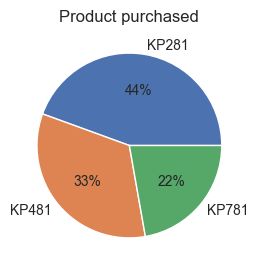

In [27]:
plt.figure(figsize=(3, 3))
plt.pie(x=prod_x_vals, labels=prod_y_vals, autopct="%1.0f%%")
plt.title("Product purchased")
plt.show()

##### Observations

1. 44% of customers have purchased product KP281.
2. 33% of customers have purchased product KP481.
3. 22% of customers have purchased product KP781.

#### Feature `Gender`

In [28]:
gen_x_vals = af_df["Gender"].value_counts()
gen_y_vals = gen_x_vals.index
gen_x_vals.reset_index(name="count")

,Gender,count
0,Male,104
1,Female,76


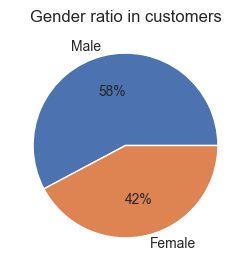

In [29]:
plt.figure(figsize=(3, 3))
plt.pie(x=gen_x_vals, labels=gen_y_vals, autopct="%1.0f%%")
plt.title("Gender ratio in customers")
plt.show()

##### Observations

1. 58% of customers are male.
2. 42% of customers are females.

#### Feature `MaritalStatus`

In [30]:
ms_x_vals = af_df["MaritalStatus"].value_counts()
ms_y_vals = ms_x_vals.index
ms_x_vals.reset_index(name="count")

,MaritalStatus,count
0,Partnered,107
1,Single,73


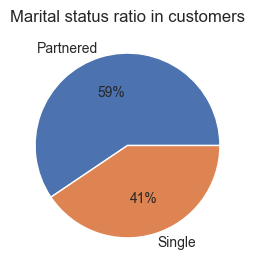

In [31]:
plt.figure(figsize=(3, 3))
plt.pie(x=ms_x_vals, labels=ms_y_vals, autopct="%1.0f%%")
plt.title("Marital status ratio in customers")
plt.show()

##### Observations

1. 59% of customers are Partnered.
2. 41% of customers are Single.

#### Feature `Fitness`

In [32]:
fit_x_vals = af_df["Fitness"].value_counts().sort_index()
fit_y_vals = fit_x_vals.index
fit_x_vals.reset_index(name="count")

,Fitness,count
0,1,2
1,2,26
2,3,97
3,4,24
4,5,31


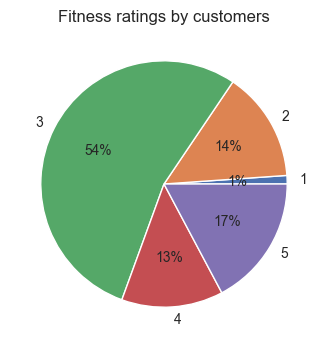

In [33]:
plt.figure(figsize=(4, 4))
plt.pie(x=fit_x_vals, labels=fit_y_vals, autopct="%1.0f%%")
plt.title("Fitness ratings by customers")
plt.show()

##### Observations

1. 1% of customers have rated themselves as 1.
2. 14% of customers have rated themselves as 2.
3. 54% of customers have rated themselves as 3.
4. 13% of customers have rated themselves as 4.
5. 17% of customers have rated themselves as 5.

### 4.2 Numerical Features

#### Feature `Age`

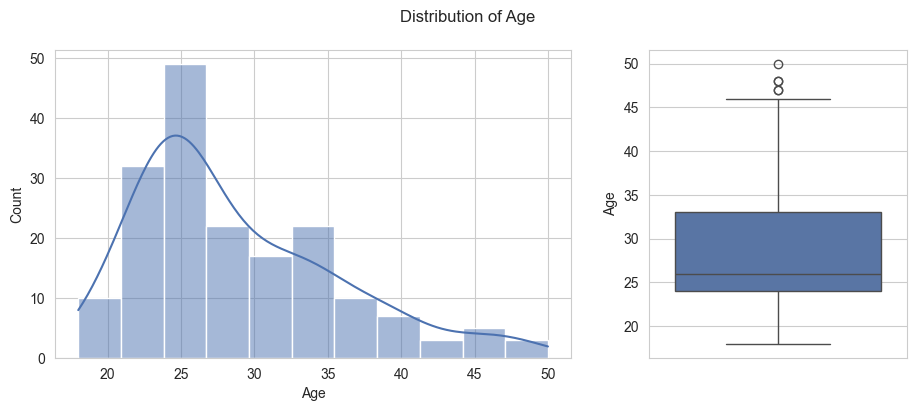

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4), gridspec_kw={"width_ratios": [2, 1]})
sns.histplot(data=af_df, x="Age", kde=True, ax=ax1)
sns.boxplot(data=af_df, y="Age", ax=ax2)
plt.suptitle("Distribution of Age")
plt.show()

#### Feature `Education`

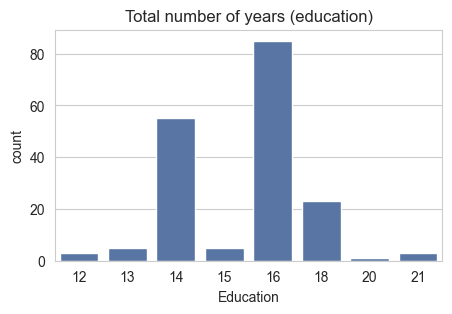

In [35]:
plt.figure(figsize=(5, 3))
sns.countplot(data=af_df, x="Education")
plt.title("Total number of years (education)")
plt.show()

#### Feature `Usage`

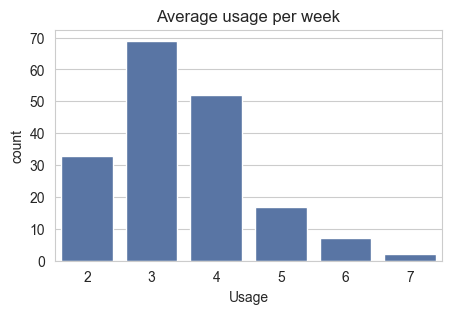

In [36]:
plt.figure(figsize=(5, 3))
sns.countplot(data=af_df, x="Usage")
plt.title("Average usage per week")
plt.show()

#### Feature `Income`

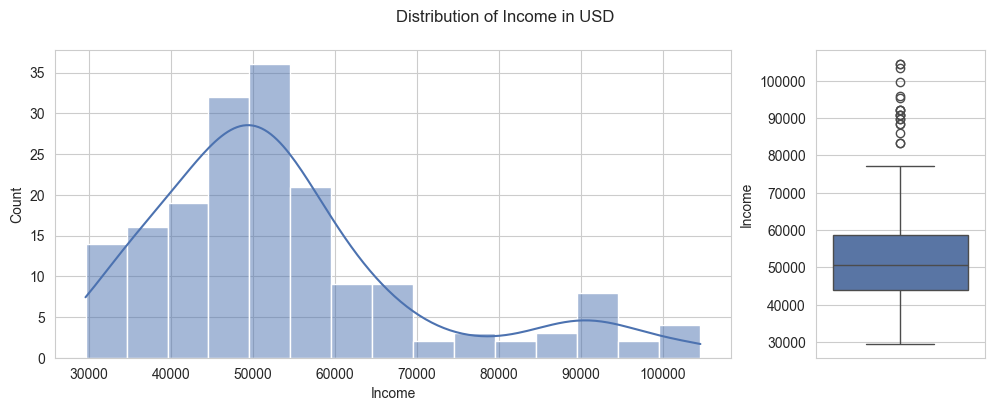

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"width_ratios": [2, 0.5]})

sns.histplot(data=af_df, x="Income", kde=True, ax=ax1)
sns.boxplot(data=af_df, y="Income", ax=ax2)
plt.suptitle("Distribution of Income in USD")

plt.show()

#### Feature `Miles`

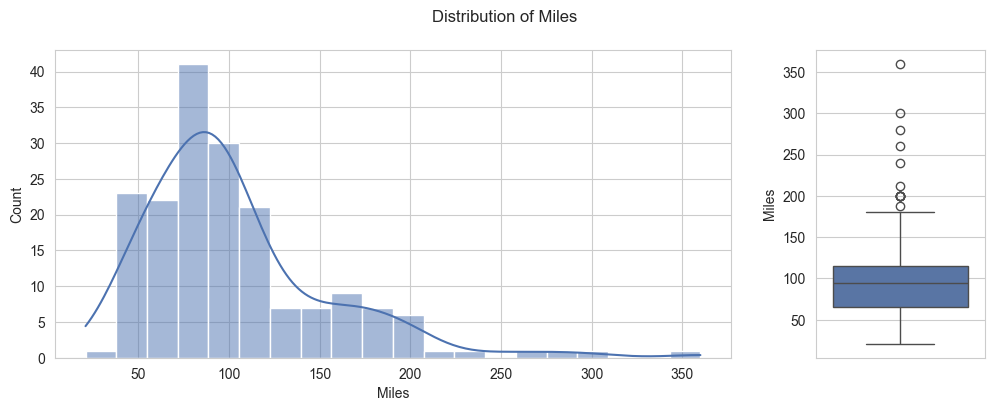

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"width_ratios": [2, 0.5]})

sns.histplot(data=af_df, x="Miles", kde=True, ax=ax1)
sns.boxplot(data=af_df, y="Miles", ax=ax2)
plt.suptitle("Distribution of Miles")

plt.show()

## 5 Bivariate Analysis

Since the objective of this EDA is to perform customer profiling for various product types, lets perform Bivariate Analysis mostly w.r.t `Product` vs rest of the features.

### 5.1 Categorical vs Categorical

#### Features `Gender` vs `Product`

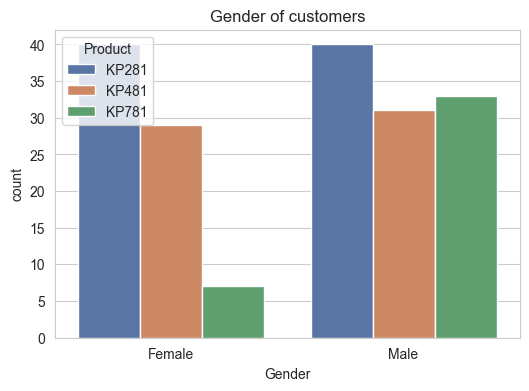

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(data=af_df, x="Gender", hue="Product")
plt.title("Gender of customers")
plt.show()

##### Observations

1. Product KP281 is most popular among males and females.
2. Males equally prefer KP481 and KP781.
3. Product KP781 is least popular among females.

#### Features `MaritalStatus` vs `Product`

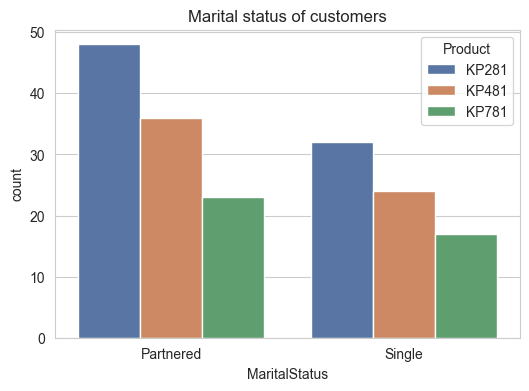

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(data=af_df, x="MaritalStatus", hue="Product")
plt.title("Marital status of customers")
plt.show()

#### Features `Fitness` vs `Product`

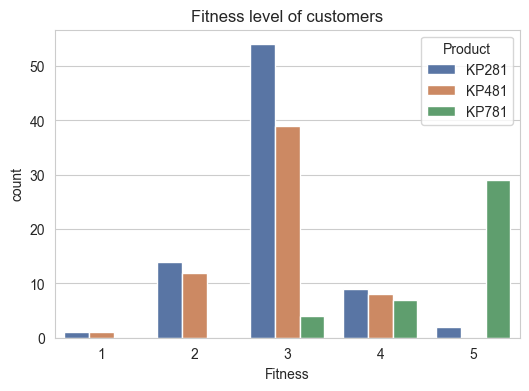

In [41]:
plt.figure(figsize=(6, 4))
sns.countplot(data=af_df, x="Fitness", hue="Product")
plt.title("Fitness level of customers")
plt.show()

##### Observations

1. Product KP281 is purchased by customers with poor to moderate fitness level.
2. Product KP781 is purchased by customers with excellent fitness level.

#### Features `Usage` vs `Product`

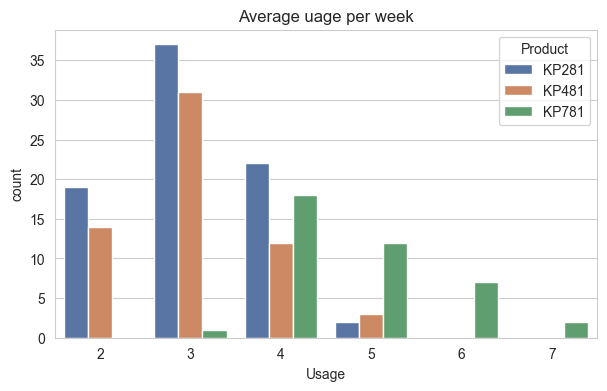

In [42]:
plt.figure(figsize=(7, 4))
sns.countplot(data=af_df, x="Usage", hue="Product")
plt.title("Average uage per week")
plt.show()

##### Observations

1. Product KP781 is purchased by customers with moderate to regular usage (4 to 7 days in a week).
2. Products KP281, KP481 are purchased by customers with low to medium usage level (2 to 4 days in week).

#### Features `Usage` vs `Gender`

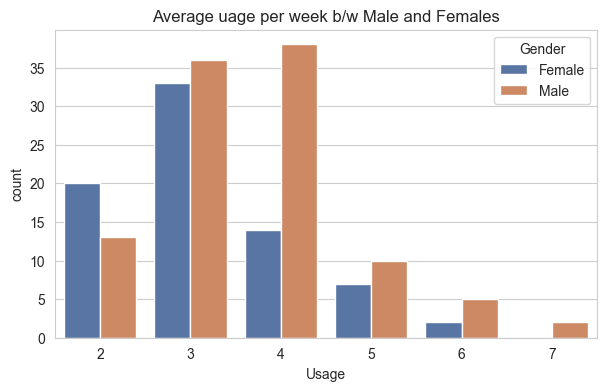

In [43]:
plt.figure(figsize=(7, 4))
sns.countplot(data=af_df, x="Usage", hue="Gender")
plt.title("Average uage per week b/w Male and Females")
plt.show()

##### Observations

1. Weekly usage count of males are higher than females.

### 5.2 Categorical vs Numerical

#### Features `Age` vs `Product`

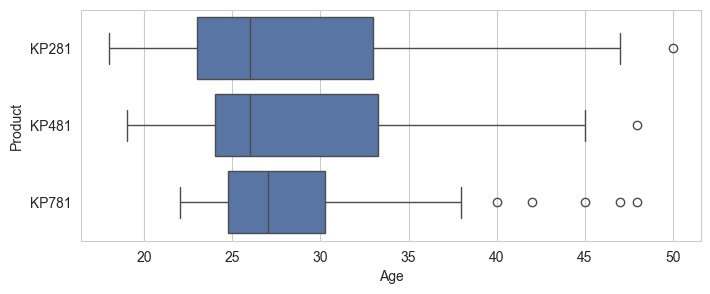

In [44]:
plt.figure(figsize=(8, 3))
sns.boxplot(data=af_df, x="Age", y="Product")
plt.show()

#### Features `Income` vs `Product`

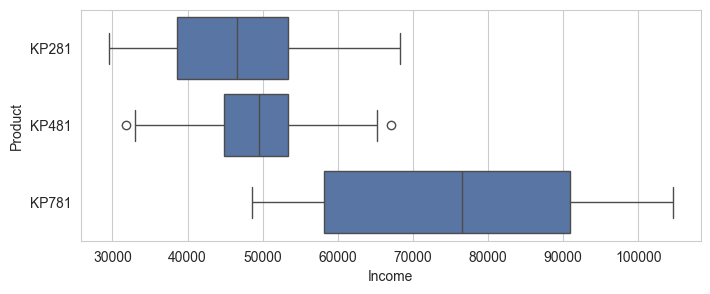

In [45]:
plt.figure(figsize=(8, 3))
sns.boxplot(data=af_df, x="Income", y="Product")
plt.show()

## 6 Multivariate Analysis

#### Features `Income` vs `Age` vs `Product`

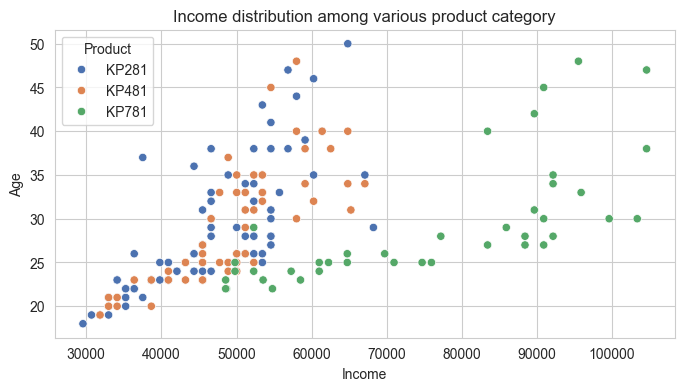

In [46]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=af_df, x="Income", y="Age", hue="Product")
plt.title("Income distribution among various product category")
plt.show()

##### Observations

1. Among all age groups customers with higher income (>50,000 dollars) purchase product KP781.
2. Products KP281 and KP481 does not cater to any specific segment.

#### Others

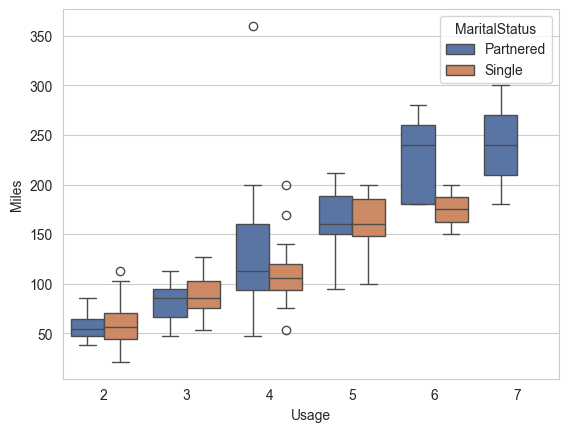

In [47]:
sns.boxplot(data=af_df, x="Usage", y="Miles", hue="MaritalStatus")
plt.show()

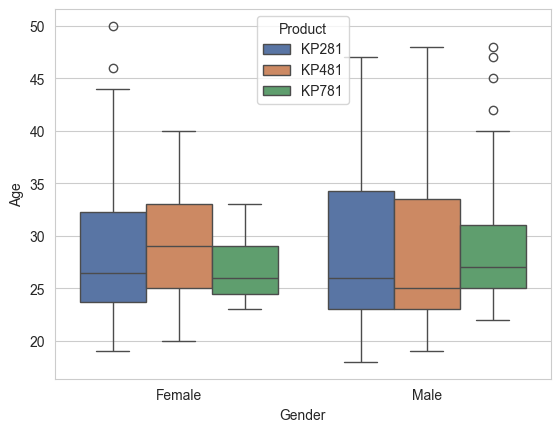

In [48]:
sns.boxplot(data=af_df, x="Gender", y="Age", hue="Product")
plt.show()

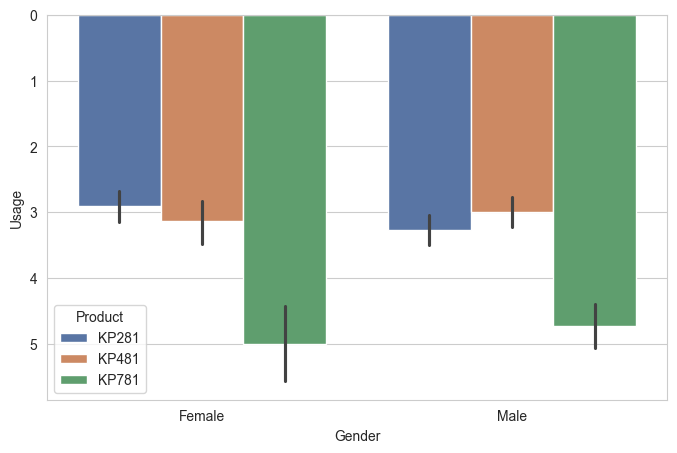

In [49]:
plt.figure(figsize=(8, 5))
sns.barplot(data=af_df, x="Gender", y="Usage", hue="Product")
plt.show()

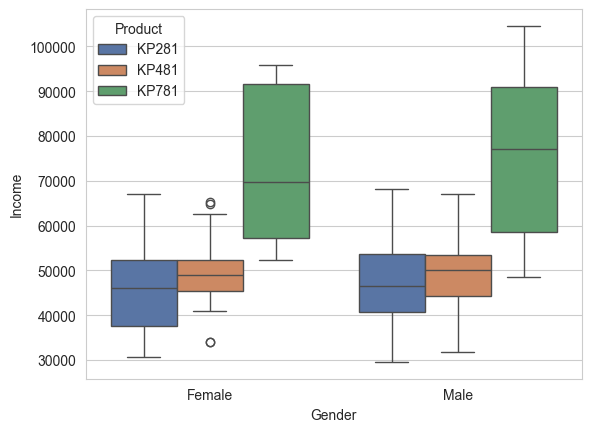

In [50]:
sns.boxplot(data=af_df, x="Gender", y="Income", hue="Product")
plt.show()

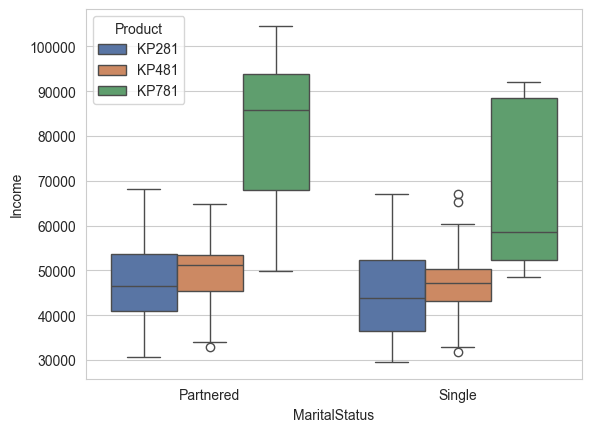

In [51]:
sns.boxplot(data=af_df, x="MaritalStatus", y="Income", hue="Product")
plt.show()

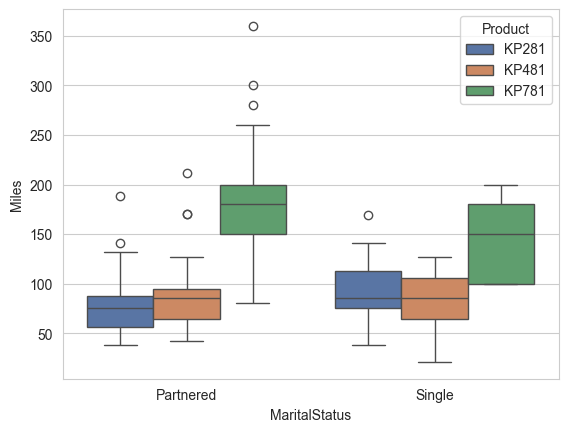

In [52]:
sns.boxplot(data=af_df, x="MaritalStatus", y="Miles", hue="Product")
plt.show()

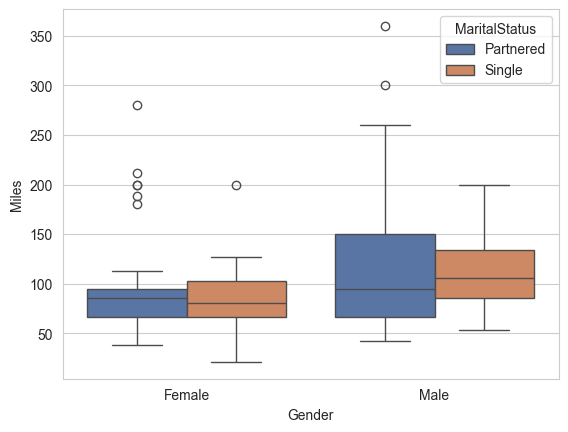

In [53]:
sns.boxplot(data=af_df, x="Gender", y="Miles", hue="MaritalStatus")
plt.show()

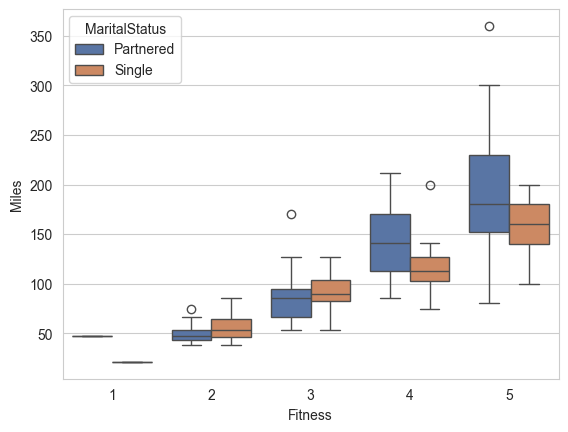

In [54]:
sns.boxplot(data=af_df, x="Fitness", y="Miles", hue="MaritalStatus")
plt.show()

## 7 Customer profiling

### 7.1 Marginal Probability

In [55]:
af_df["AgeGroup"].value_counts(normalize=True).round(2).reset_index(name="probability")

,AgeGroup,probability
0,Adults,0.5
1,Youngsters,0.3
2,Middle,0.2


In [56]:
af_df["EducationLevel"].value_counts(normalize=True).round(2).reset_index(name="probability")

,EducationLevel,probability
0,Moderate,0.50
1,Basic,0.35
2,High,0.15


In [57]:
af_df["UsageLevel"].value_counts(normalize=True).round(2).reset_index(name="probability")

,UsageLevel,probability
0,Moderate,0.67
1,Low,0.18
2,High,0.14


In [58]:
af_df["FitnessLevel"].value_counts(normalize=True).round(2).reset_index(name="probability")

,FitnessLevel,probability
0,Moderate,0.67
1,High,0.17
2,Low,0.16


### 7.2 Conditional Probability

#### Purchase given Gender

In [59]:
pd.crosstab(
    index=af_df["Product"],
    columns=af_df["Gender"],
    margins=True,
    margins_name="probability",
    normalize=True,
).round(2)

Gender,Female,Male,probability
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
probability,0.42,0.58,1.00


##### Product KP281

1. P(KP281 | Female) = 22%
2. P(KP281 | Male) = 22%

##### Product KP481

1. P(KP481 | Female) = 16%
2. P(KP481 | Male) = 17%

##### Product KP781

1. P(KP781 | Female) = 4%
2. P(KP781 | Male) = 18%

#### Purchase given Marital status

In [60]:
pd.crosstab(
    index=af_df["Product"],
    columns=af_df["MaritalStatus"],
    margins=True,
    margins_name="probability",
    normalize=True,
).round(2)

MaritalStatus,Partnered,Single,probability
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
probability,0.59,0.41,1.00


##### Product KP281

1. P(KP281 | Partnered) = 27%
2. P(KP281 | Single) = 18%

##### Product KP481

1. P(KP481 | Partnered) = 20%
2. P(KP481 | Single) = 13%

##### Product KP781

1. P(KP781 | Partnered) = 13%
2. P(KP781 | Single) = 9%

#### Purchase given Fitness level

In [61]:
pd.crosstab(
    index=af_df["Product"],
    columns=af_df["FitnessLevel"],
    margins=True,
    margins_name="probability",
    normalize=True,
).round(2)

FitnessLevel,Low,Moderate,High,probability
Product,,,,
KP281,0.08,0.35,0.01,0.44
KP481,0.07,0.26,0.00,0.33
KP781,0.00,0.06,0.16,0.22
probability,0.16,0.67,0.17,1.00


##### Product KP281

1. P(KP281 | Low) = 8%
2. P(KP281 | Moderate) = 35%
3. P(KP281 | High) = 1%

##### Product KP481

1. P(KP481 | Low) = 7%
2. P(K4281 | Moderate) = 26%
3. P(KP481 | High) = 0%

##### Product KP781

1. P(KP781 | Low) = 0%
2. P(KP781 | Moderate) = 6%
3. P(KP781 | High) = 16%

#### Purchase given Age group

In [62]:
pd.crosstab(
    index=af_df["Product"],
    columns=af_df["AgeGroup"],
    margins=True,
    margins_name="probability",
    normalize=True,
).round(2)

AgeGroup,Youngsters,Adults,Middle,probability
Product,,,,
KP281,0.15,0.20,0.09,0.44
KP481,0.09,0.17,0.07,0.33
KP781,0.06,0.13,0.04,0.22
probability,0.30,0.50,0.20,1.00


##### Product KP281

1. P(KP281 | Youngsters) = 15%
2. P(KP281 | Adults) = 20%
3. P(KP281 | Middle Aged) = 9%

##### Product KP481

1. P(KP481 | Youngsters) = 9%
2. P(KP481 | Adults) = 17%
3. P(KP481 | Middle Aged) = 7%

##### Product KP781

1. P(KP781 | Youngsters) = 6%
2. P(KP781 | Adults) = 13%
3. P(KP781 | Middle Aged) = 4%

#### Purchase given Education Level

In [63]:
pd.crosstab(
    index=af_df["Product"],
    columns=af_df["EducationLevel"],
    margins=True,
    margins_name="probability",
    normalize=True,
).round(2)

EducationLevel,Basic,Moderate,High,probability
Product,,,,
KP281,0.19,0.24,0.01,0.44
KP481,0.14,0.18,0.01,0.33
KP781,0.01,0.08,0.13,0.22
probability,0.35,0.50,0.15,1.00


##### Product KP281

1. P(KP281 | Basic) = 19%
2. P(KP281 | Moderate) = 24%
3. P(KP281 | High) = 1%

##### Product KP481

1. P(KP481 | Basic) = 14%
2. P(KP481 | Moderate) = 18%
3. P(KP481 | High) = 1%

##### Product KP781

1. P(KP781 | Basic) = 1%
2. P(KP781 | Moderate) = 8%
3. P(KP781 | High) = 13%

#### Purchase given Usage Level

In [64]:
pd.crosstab(
    index=af_df["Product"],
    columns=af_df["UsageLevel"],
    margins=True,
    margins_name="probability",
    normalize=True,
).round(2)

UsageLevel,Low,Moderate,High,probability
Product,,,,
KP281,0.11,0.33,0.01,0.44
KP481,0.08,0.24,0.02,0.33
KP781,0.00,0.11,0.12,0.22
probability,0.18,0.67,0.14,1.00


##### Product KP281

1. P(KP281 | Low) = 11%
2. P(KP281 | Moderate) = 33%
3. P(KP281 | High) = 1%

##### Product KP481

1. P(KP481 | Low) = 8%
2. P(KP481 | Moderate) = 24%
3. P(KP481 | High) = 2%

##### Product KP781

1. P(KP781 | Low) = 0%
2. P(KP781 | Moderate) = 11%
3. P(KP781 | High) = 12%

#### Purchase given Income Class

In [65]:
pd.crosstab(
    index=af_df["Product"],
    columns=af_df["IncomeClass"],
    margins=True,
    margins_name="probability",
    normalize=True,
).round(2)

IncomeClass,Low,Middle,Upper,probability
Product,,,,
KP281,0.27,0.18,0.00,0.44
KP481,0.17,0.17,0.00,0.33
KP781,0.03,0.08,0.12,0.22
probability,0.46,0.42,0.12,1.00


##### Product KP281

1. P(KP281 | Low) = 27%
2. P(KP281 | Middle) = 18%
3. P(KP281 | Upper) = 0%

##### Product KP481

1. P(KP481 | Low) = 17%
2. P(KP481 | Middle) = 17%
3. P(KP481 | Upper) = 0%

##### Product KP781

1. P(KP781 | Low) = 3%
2. P(KP781 | Middle) = 8%
3. P(KP781 | Upper) = 12%

#### Purchase given Gender and Marital-status

In [66]:
pd.crosstab(
    index=af_df["Product"],
    columns=[af_df["Gender"], af_df["MaritalStatus"]],
    margins=True,
    margins_name="probability",
    normalize=True,
).round(2)

Gender           Female             Male        probability
MaritalStatus Partnered Single Partnered Single            
Product                                                    
KP281              0.15   0.07      0.12   0.11        0.44
KP481              0.08   0.08      0.12   0.06        0.33
KP781              0.02   0.02      0.11   0.08        0.22
probability        0.26   0.17      0.34   0.24        1.00

##### Product KP281

1. P(KP281 | Low) = 27%
2. P(KP281 | Middle) = 18%
3. P(KP281 | Upper) = 0%

##### Product KP481

1. P(KP481 | Middle) = 17%
2. P(KP481 | Middle) = 17%
3. P(KP481 | Upper) = 0%

##### Product KP781

1. P(KP781 | Middle) = 3%
2. P(KP781 | Middle) = 8%
3. P(KP781 | Upper) = 12%

#### Purchase given Marital-status and Income

In [67]:
pd.crosstab(
    index=af_df["Product"],
    columns=[af_df["MaritalStatus"], af_df["Gender"]],
    margins=True,
    margins_name="probability",
    normalize=True,
).round(2)

MaritalStatus Partnered       Single       probability
Gender           Female  Male Female  Male            
Product                                               
KP281              0.15  0.12   0.07  0.11        0.44
KP481              0.08  0.12   0.08  0.06        0.33
KP781              0.02  0.11   0.02  0.08        0.22
probability        0.26  0.34   0.17  0.24        1.00

##### Observations

1. P(Female | Partnered) is greater than P(Female | Single) i.e., Females with partners have high probability of buying product compared to single females.
2. P(Male | Partnered) is greater than P(Male | Single) i.e., Males with partners have high probability of buying product compared to single males.

#### Purchase given Age-group and Income

In [68]:
pd.crosstab(
    index=af_df["Product"],
    columns=[af_df["AgeGroup"], af_df["IncomeClass"]],
    margins=True,
    margins_name="probability",
    normalize=True,
).round(2)

AgeGroup    Youngsters        Adults              Middle              probability
IncomeClass        Low Middle    Low Middle Upper    Low Middle Upper            
Product                                                                          
KP281             0.15   0.00   0.09   0.11  0.00   0.02   0.07  0.00        0.44
KP481             0.09   0.01   0.07   0.10  0.00   0.01   0.06  0.00        0.33
KP781             0.02   0.03   0.01   0.04  0.08   0.00   0.00  0.04        0.22
probability       0.26   0.04   0.17   0.25  0.08   0.03   0.13  0.04        1.00

##### Observations

P(KP281 | Youngsters and Low-income) = 15%

### 7.3 Customer profiling

#### Product KP281

1. Most popular among males and females. Overall 44% of them have purchased this product.
1. Most popular among partnered couples. 27% of couples have purchased this product.
1. Suitable for customers with low to moderate fitness ratings (between 2 and 4).
1. Most popular among youngsters (age less than 25), 15% of them have purchased this product.
1. Most popular among young adults (age between 25 than 35), 20% of them have purchased this product.

#### Product KP481

> Note: Relative comparison with Product KP281

1. Relatively less popular among males and females. Overall 33% of them have purchased this product.
1. Relatively less popular among partnered couples. 20% of couples have purchased this product.
1. Suitable for customers with low to moderate fitness ratings (between 2 and 4).
1. Relatively less popular among young adults (age between 25 than 35), 17% of them have purchased this product.

#### Product KP781

1. Least popular among females only 4% females have purchased this product.
1. Suitable for customers with high fitness ratings (greater than 4).
1. Least popular mong youngsters. Only 6% of them have purchased this product.
1. Suitable for customers who regularly use the product (greater than 5 times a week).
1. Suitable for customers with high income range (greater than 75,000 dollars).

## 8 Conclusion

### 8.1 Business Insights

#### Product Insights

1. Products KP281 and KP481 does not cater to any specific segment.
1. The data show that KP481(mid level) has almost same type of users as that of KP281(entry level).
1. Product KP781 is popular among high income individuals.
1. Product KP281 is most popular among females.
1. Product KP781 is least popular among females.
1. Product KP781 is purchased by customers with excellent fitness level.
1. Product KP281 is purchased by customers with poor to moderate fitness level.
1. Product KP781 is purchased by customers with  regular usage (5 to 7 days in a week).

#### Customer Insights

1. Among the customers 58% are males and 42% are females.
1. Male customers plan to utilize product at higher rate compared to females.
1. 59% of customers have partners and remaining 41% are single. Customers with partners have higher probability of purchasing a product compared to single customers.
1. 75% of the customers are below 35 years of age. Customers between age 25 and 35 have greater probability of buying products compared to other age groups.
1. Most customers plan to use the product 4 times in week.
1. 44% of customers have purchased product KP281.
1. 33% of customers have purchased product KP481.
1. 22% of customers have purchased product KP781.

### 8.2 Recommendations

1. Products KP281 and KP481 does not cater to any specific segment and can create confusion among customers hence requires a good business model to distinguish them.
2. Product KP781 needs to be promoted among partnered couples specifically Females.
3. Product KP781 has poor sales, 22% compared to other products, hence it requires targeted advertisements towards high fitness and high usage individuals.
4. Products must be designed keeping young adults in focus seince customers between age 25 and 35 have greater probability of buying products compared to other age groups.
5. Probability of low income-class have higher probability of buying products KP281 and KP481 hence target these products accordingly.